In [1]:
import os
import glob
import cv2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Input
from keras.optimizers import SGD
from keras.models import load_model

Using TensorFlow backend.


In [3]:
folder_path="C:/Users/amit/Downloads/image classification/dataset/Train Images"
a=pd.read_csv('train.csv')
filename=np.array(a['Image'])
X_train=list()
for i in range(0,len(filename)):
    
    path=os.path.join(folder_path, filename[i])
    z=cv2.imread(path)
    z=cv2.resize(z,(224,224))
    
    #z = preprocess_input(z)
    X_train.append(z)


NameError: name 'pd' is not defined

In [49]:
p=cv2.imread("C:/Users/amit/Downloads/image classification/dataset/Train Images/image10335.jpg")

In [4]:
import pandas as pd

ImportError: Unable to import required dependencies:
numpy: No module named 'numpy.core._ufunc_config'

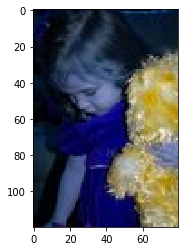

In [50]:
plt.imshow(p)
z=cv2.resize(z,(224,224))

In [28]:
a=pd.read_csv('train.csv')
labels=a['Class'].values

In [29]:
dic={'Food':[1,0,0,0],'misc':[0,0,0,1],'Attire':[0,1,0,0],'Decorationandsignage':[0,0,1,0]}
y=list()
for i in labels:
    y.append(dic[i])

In [30]:
Y_train=np.array(y)

In [52]:
X_train=np.array(X_train)


In [29]:
X_train.shape

NameError: name 'X_train' is not defined

In [6]:
x = tf.placeholder("float", [None, 80,80,3])
y = tf.placeholder("float", [None, 4])

In [27]:
folder_path="C:/Users/amit/Downloads/image classification/dataset/Test Images"
a=pd.read_csv('test.csv')
filename=np.array(a['Image'])
X_test=list()
for i in range(0,len(filename)):
    path=os.path.join(folder_path, filename[i])
    z=cv2.imread(path)
    z=cv2.resize(z,(224,224))
    X_test.append(z)

Exception ignored in: <function EagerResourceDeleter.__del__ at 0x0000018F70E96AF8>
Traceback (most recent call last):
  File "C:\Users\amit\Anaconda3\lib\site-packages\tensorflow_core\python\ops\resource_variable_ops.py", line 272, in __del__
    try:
KeyboardInterrupt: 


KeyboardInterrupt: 

In [4]:
X_test=np.array(X_test)


In [5]:
X_test.shape


(3219, 224, 224, 3)

In [41]:
lab={0:'Food',3:'misc',1:'Attire',2:'Decorationandsignage'}

In [42]:
t=list()
for i in range(len(z)):
    t.append(lab[z[i]])

In [43]:
len(t)

3219

In [44]:
a=pd.read_csv('test.csv')
a['Class']=t

In [45]:
a.to_csv('model6.csv',index=False)

In [2]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
#import numpy as np

#model = VGG16(weights='imagenet')

In [48]:
#model_vgg16_conv = VGG16(weights='imagenet', include_top=False)
base=Model(inputs=model.input,outputs=model.get_layer('flatten').output)
for layer in base.layers:
    layer.trainable = False

keras_input = Input(shape=(224,224,3), name = 'image_input')

output_vgg16_conv = base(keras_input)
    
#Add the fully-connected layers 

x = Dense(4096, activation='relu', name='fc1')(output_vgg16_conv)
x = Dense(4096, activation='relu', name='fc2')(x)
x = Dense(4, activation='softmax', name='predictions')(x)

In [38]:
my_model = Model(input=keras_input, output=x)

C:\Users\amit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("im..., outputs=Tensor("pr...)`
  """Entry point for launching an IPython kernel.


In [1]:
my_model.summary()

NameError: name 'my_model' is not defined

In [44]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [75]:
x = np.expand_dims(X_train[0], axis=0)
x = preprocess_input(x)

In [46]:
base.summary()

NameError: name 'base' is not defined

In [21]:
model6 = Sequential()

model6.add(Dense(1000, activation='relu', input_dim=4096))
model6.add(Dropout(0.5))

model6.add(Dense(512, activation='relu'))
model6.add(Dropout(0.5))

model6.add(Dense(64, activation='relu'))
model6.add(Dropout(0.5))
model6.add(Dense(4, activation='softmax'))

In [78]:
model5.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 4096)              102764544 
_________________________________________________________________
dropout_30 (Dropout)         (None, 4096)              0         
_________________________________________________________________
dense_51 (Dense)             (None, 4096)              16781312  
_________________________________________________________________
dropout_31 (Dropout)         (None, 4096)              0         
_________________________________________________________________
dense_52 (Dense)             (None, 64)                262208    
_________________________________________________________________
dropout_32 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_53 (Dense)             (None, 4)               

In [51]:
output=list()
for i in X_train:
    x = np.expand_dims(i, axis=0)
    x = preprocess_input(x)
    output.append(base.predict(x))
    

In [ ]:

np.savetxt("array.txt", np.array(output), fmt="%s")

In [52]:
np.array(output).tofile('x_train_1.txt',sep=" ",format="%s")

In [53]:
v=np.array(output)

In [33]:
with open('x_test.txt') as f:
    s=f.read()

In [34]:
b=s.split(" ")

In [5]:
len(b)

13185024

In [25]:
4096

4096

In [26]:
X_train.shape 3219

(5983, 224, 224, 3)

In [35]:
x=np.array(b)

In [30]:
z=np.array(range(100))

In [36]:
v=np.reshape(x,(3219,4096))

In [37]:
v.shape

(3219, 4096)

In [56]:
v=np.squeeze(v)

In [31]:
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model6.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])
history = model6.fit(v[:-50],Y_train[:-50], epochs=50,validation_data=(v[-50:],Y_train[-50:]))

Train on 5933 samples, validate on 50 samples
Epoch 1/50
5933/5933 [==============================] - 55s 9ms/step - loss: 1.3039 - accuracy: 0.4628 - val_loss: 0.9267 - val_accuracy: 0.6600
Epoch 2/50
5933/5933 [==============================] - 52s 9ms/step - loss: 1.0187 - accuracy: 0.5742 - val_loss: 0.7220 - val_accuracy: 0.7200
Epoch 3/50
5933/5933 [==============================] - 51s 9ms/step - loss: 0.9102 - accuracy: 0.6412 - val_loss: 0.6901 - val_accuracy: 0.7400
Epoch 4/50
5933/5933 [==============================] - 53s 9ms/step - loss: 0.8227 - accuracy: 0.6787 - val_loss: 0.6088 - val_accuracy: 0.8200
Epoch 5/50
5933/5933 [==============================] - 54s 9ms/step - loss: 0.7767 - accuracy: 0.7066 - val_loss: 0.5516 - val_accuracy: 0.8400
Epoch 6/50
5933/5933 [==============================] - 50s 8ms/step - loss: 0.7351 - accuracy: 0.7177 - val_loss: 0.5220 - val_accuracy: 0.8400
Epoch 7/50
5933/5933 [==============================] - 54s 9ms/step - loss: 0.7142 

KeyboardInterrupt: 

In [32]:
model6.save('model_6')

In [41]:
X_train*255

array([[[[ 45.,  45.,  57.],
         [ 45.,  45.,  57.],
         [ 46.,  46.,  58.],
         ...,
         [ 44.,  46.,  57.],
         [ 43.,  45.,  56.],
         [ 43.,  45.,  56.]],

        [[ 46.,  46.,  58.],
         [ 46.,  46.,  58.],
         [ 47.,  47.,  58.],
         ...,
         [ 44.,  46.,  57.],
         [ 43.,  46.,  57.],
         [ 43.,  46.,  56.]],

        [[ 47.,  47.,  59.],
         [ 47.,  47.,  59.],
         [ 48.,  48.,  60.],
         ...,
         [ 45.,  47.,  58.],
         [ 45.,  47.,  58.],
         [ 45.,  46.,  57.]],

        ...,

        [[ 23.,  22.,  26.],
         [ 23.,  22.,  26.],
         [ 23.,  22.,  26.],
         ...,
         [ 18.,  17.,  21.],
         [ 18.,  17.,  21.],
         [ 18.,  17.,  21.]],

        [[ 22.,  21.,  25.],
         [ 22.,  21.,  25.],
         [ 22.,  21.,  25.],
         ...,
         [ 18.,  17.,  20.],
         [ 17.,  16.,  20.],
         [ 17.,  16.,  20.]],

        [[ 22.,  21.,  25.],
       

In [19]:
adam=load_model('model_adam_f2')

In [38]:
y=model6.predict(v)

In [39]:
z=np.argmax(y,axis=1)

In [40]:
z

array([0, 0, 0, ..., 3, 3, 3], dtype=int64)

In [20]:
adam.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 1000)              4097000   
_________________________________________________________________
dropout_13 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               512512    
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)               